In [1]:
import numpy as np
import pyplume as pl
from datetime import datetime
from matplotlib import pyplot as plt

def save_large_mat(data,filename):
    nx,ny,nz,nt = np.shape(data)
    half = int(nt/2)
    pl.savemat(data[:,:,:,:half],filename+"_1")
    pl.savemat(data[:,:,:,half:],filename+"_2")
    
def hf_plume_interface(data,threshold):
    data = data/np.max(data)
#     data = np.mean(data,2)
    data[data<threshold] = 0
    data[data>threshold] = 1
    return data

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [3]:
folder = r'Z:\Thanh\DC_h_2.5.restart'
filename = "DC_h_2.5.restart"
# U = pl.hf_loadmat(folder+'\\'+filename+"_U")
# W = pl.hf_loadmat(folder+'\\'+filename+"_W")
# V = pl.hf_loadmat(folder+'\\'+filename+"_V")
T = pl.hf_loadmat(folder+'\\'+filename+"_T")

gT = pl.gprimeT(T,300,9.81)

In [24]:
# data = np.mean(vor[2,:,22,:,:],2)
# data = vor[2,:,22,:,600]

dx=40
dz=10
D=400
Ta=300
g=9.81
threshold =0.001
interface  = hf_plume_interface(gT,threshold)

In [20]:
print(np.shape(gT))

(45, 45, 700, 1200)


In [16]:
l2 = pl.hf_loadmat(folder+'\\'+"DC_h_2.5.restart_lambda2")

v1 = pl.hf_loadmat(folder+'\\'+"DC_h.2.5_vorticity1")
v2 = pl.hf_loadmat(folder+'\\'+"DC_h.2.5_vorticity2")
v3 = pl.hf_loadmat(folder+'\\'+"DC_h.2.5_vorticity3")
print('loading done')

In [82]:
def hf_contour(data,interface,dx,dz,D,threshold,title,color='jet',mint = np.min(data),maxt = np.max(data)):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    data = data.T
    interface = interface.T
    nz,nx = np.shape(data)
    plt.style.use('seaborn-white')
    xi = np.linspace(-nx*.5*dx/D, nx*.5*dx/D, nx)
    zi = np.linspace(0, nz*dz/D, nz)
    plt.figure(figsize=(10, 10))
#     contours  = plt.contour(xi,zi,interface,0,linewidths=1, colors='black')
    plt.ylabel("$z/D$",fontsize=14)
    plt.xlabel("$x/D$", rotation=0, fontsize=14, labelpad=10)
    plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], 
               origin='lower',cmap=color,alpha=1,aspect='auto',vmin=mint, vmax=maxt)
#     plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], 
#                origin='lower',cmap=color,alpha=1,aspect='auto')
    plt.colorbar()
    
#     Creating a folder for the plots
    current_directory = os.getcwd()
    final_directory = os.path.join(current_directory, r'Plots')
    if not os.path.exists(final_directory):
       os.makedirs(final_directory) 
    plt.savefig(final_directory+"\\"+title+".png")

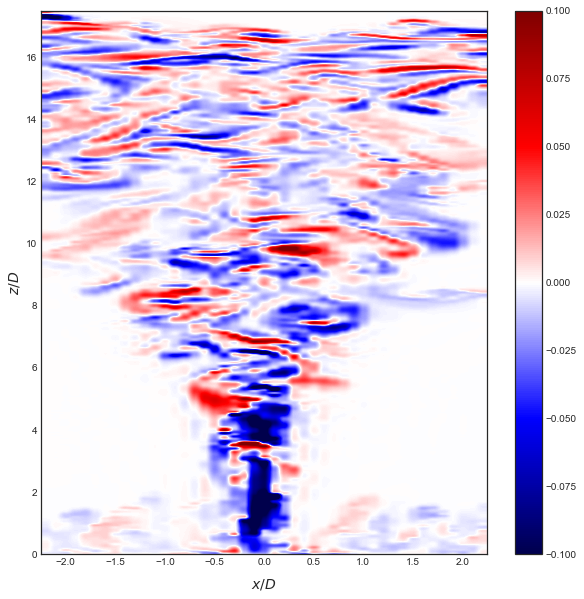

In [96]:
title = "Vorticity_OmegaX"
time = 600
data = v1
color = "seismic"
# color = "RdBu"

inter = interface[:,22,:,time]

inter = np.mean(interface[:,:,:,time],1)

# inter = np.mean(interface[:,:,:,:],3)
# print(np.shape(inter))
# inter = np.mean(inter,1)

mint = -0.1
maxt = 0.1
data = data[:,22,:,time]
# hf_contour(data,inter,dx,dz,D,threshold,title,color)
hf_contour(data,inter,dx,dz,D,threshold,title,color,mint,maxt)

In [ ]:
hf_profile1 = pl.high_frequency_profile(Tt,Ut,Vt,Wt,dx,dz,D,Ta,g,threshold)

In [ ]:
def hf_contour(data,interface,dx,dz,D,threshold,title):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    data = data.T
    interface = interface.T
    nz,nx = np.shape(data)
    plt.style.use('seaborn-white')
    xi = np.linspace(-nx*.5*dx/D, nx*.5*dx/D, nx)
    zi = np.linspace(0, nz*dz/D, nz)
    plt.figure(figsize=(10, 10))
    contours  = plt.contour(xi,zi,interface,0,linewidths=0.5, colors='black')
    plt.ylabel("$z/D$",fontsize=14)
    plt.xlabel("$x/D$", rotation=0, fontsize=14, labelpad=10)
    plt.imshow(data, extent=[-nx*.5*dx/D, nx*.5*dx/D,0, nz*dz/D], origin='lower',cmap='jet',alpha=1,aspect='auto')
    plt.colorbar()
    #Creating a folder for the plots
    current_directory = os.getcwd()
    final_directory = os.path.join(current_directory, r'Plots')
    if not os.path.exists(final_directory):
       os.makedirs(final_directory) 
    plt.savefig(final_directory+"\\"+title+".png")

In [ ]:
# Contour Plot 
hf_contour(hf_profile1.Re_stress_UW,hf_profile1.interface,dx,dz,D,threshold,"Reynolds Stress UW")
hf_contour(hf_profile1.Re_stress_VW,hf_profile1.interface,dx,dz,D,threshold,"Reynolds Stress VW")
hf_contour(hf_profile1.TKE_buoyant_production_I,hf_profile1.interface,dx,dz,D,threshold,"TKE Buoyant Production I")
hf_contour(hf_profile1.TKE_shear_pro_UW,hf_profile1.interface,dx,dz,D,threshold,"TKE Shear Production UW")
hf_contour(hf_profile1.TKE_shear_pro_VW,hf_profile1.interface,dx,dz,D,threshold,"TKE Shear Production VW")
hf_contour(hf_profile1.TKE_buoyant_production_II,hf_profile1.interface,dx,dz,D,threshold, "TKE Buoyant Production II")
hf_contour(hf_profile1.TKE, hf_profile1.interface,dx,dz,D,threshold,"TKE")

In [ ]:
# Tesiting out Centerline plot
U_rms_centerline = hf_profile1.U_rms_centerline
V_rms_centerline = hf_profile1.V_rms_centerline
W_rms_centerline = hf_profile1.W_rms_centerline
TKE_centerline = hf_profile1.TKE_centerline
TKE_buoyant_production_I_centerline = hf_profile1.TKE_buoyant_production_I_centerline
TKE_buoyant_production_II_centerline = hf_profile1.TKE_buoyant_production_II_centerline
TKE_shear_pro_UW_centerline = hf_profile1.TKE_shear_pro_UW_centerline
TKE_shear_pro_VW_centerline = hf_profile1.TKE_shear_pro_VW_centerline

mark = 20
plt.figure(figsize=(10, 7))
zi = np.linspace(0, nz*dz/D, nz)
plotdata = U_rms_centerline/wcm
plt.plot(zi,plotdata,'bo--', label='U_rms_centerline', markevery = mark, linewidth=3)
plotdata = V_rms_centerline/wcm
plt.plot(zi,plotdata,'gs--', label='V_rms_centerline',markevery = mark, linewidth=3)
plotdata = W_rms_centerline/wcm
plt.plot(zi,plotdata,'rv--', label='W_rms_centerline',markevery = mark, linewidth=3)
plotdata = TKE_centerline/(wcm**2)
plt.plot(zi,plotdata,'m8--', label='TKE_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_I_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'yx--', label='TKE_buoyant_production_I_centerline',markevery = mark, linewidth=3)
plotdata = TKE_buoyant_production_II_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'kp--', label='TKE_buoyant_production_II_centerline', markevery = mark,linewidth=3)
plotdata = TKE_shear_pro_UW_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'D--', label='TKE_shear_pro_UW_centerline', markevery = mark,linewidth=3)
plotdata = TKE_shear_pro_VW_centerline/((wcm**3)/D)
plt.plot(zi,plotdata,'|--', label='TKE_shear_pro_VW_centerline', markevery = mark,linewidth=3)
plt.legend()
plt.xlabel("$z/D$")
plt.savefig(dataname+"_HF_Centerline_Profile.png")

In [ ]:
nz =700
nx =45
wcm = np.max(Wt[22,:])
dataname = "DC_h_2.5.restart"

In [ ]:
# start_time = datetime.now()

# vor = pl.vorticity(U,V,W,40,40,10,1)

# end_time = datetime.now()
# print("Duration:", end_time - start_time)

In [ ]:
np.shape(vor)
# save_large_mat(vor[0],(folder+"\\DC_h.2.5_vorticity1"))
# save_large_mat(vor[1],(folder+"\\DC_h.2.5_vorticity2"))
# save_large_mat(vor[2],(folder+"\\DC_h.2.5_vorticity3"))